In [1]:
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot

from rasterio.plot import show

from rasterstats import zonal_stats

import fiona

In [2]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'


In [3]:
bound = 'C:/Users/GIGABYTE/Desktop/Đánh giá tiềm năng khu vực/Thanh Hoa.kml'
wind = 'C:/Users/GIGABYTE/Desktop/Đánh giá tiềm năng khu vực/Data wind/thanh_h_a_wind-speed_100m.tif'
catchments = gpd.read_file(bound, driver='KML')
demdata = rasterio.open(wind)

C:\Users\GIGABYTE\anaconda3\envs\esm-tutorials\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


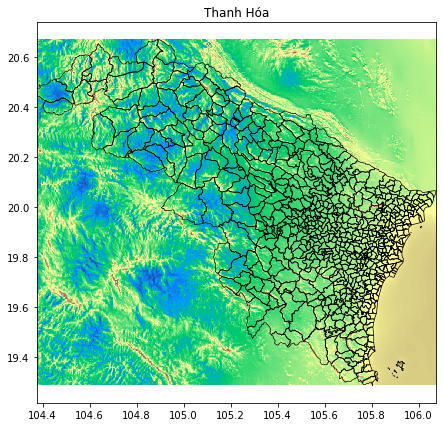

<Figure size 432x288 with 0 Axes>

In [4]:
fig, ax = plt.subplots(1, figsize=(9, 7))

show((demdata, 1), cmap='terrain', interpolation='none', ax=ax)

catchments.plot(ax=ax, facecolor="none", edgecolor='black', lw=0.7)

plt.title("Thanh Hóa")

plt.show()

plt.tight_layout()

In [5]:
zs = zonal_stats(bound, wind, stats=['mean','std'])

demstats_df = pd.DataFrame(zs)

demstats_df.rename(columns={'mean':'dem_mean','std':'dem_std'}, inplace=True)

catchments = pd.concat([catchments, demstats_df], axis=1)


C:\Users\GIGABYTE\anaconda3\envs\esm-tutorials\lib\site-packages\rasterstats\io.py:94: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in src:


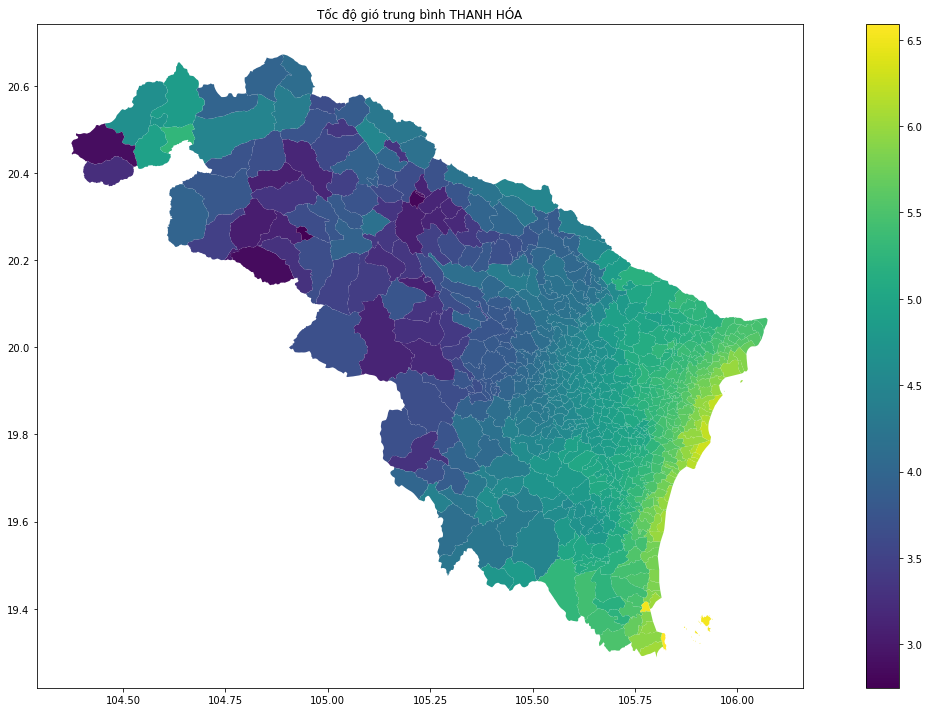

In [6]:
fig, ax = plt.subplots(1,  figsize=(18, 10))
plt.title("Tốc độ gió trung bình THANH HÓA")
catchments.plot(column='dem_mean', ax=ax, legend=True)
plt.tight_layout()


In [7]:
import numpy as np
from shapely.geometry import Polygon, Point
import random


In [8]:
def random_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds

    points = []

    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            points.append(random_point)

    return points


In [9]:
def random_point_within_1(poly):
    min_x, min_y, max_x, max_y = poly.bounds

    x = random.uniform(min_x, max_x)
    x_line = LineString([(x, min_y), (x, max_y)])
    x_line_intercept_min, x_line_intercept_max = x_line.intersection(poly).xy[1].tolist()
    y = random.uniform(x_line_intercept_min, x_line_intercept_max)

    return Point([x, y])

In [17]:
import geopandas as gpd
area_shape  = gpd.read_file('C:/Users/GIGABYTE/Desktop/Đánh giá tiềm năng khu vực/Data wind/Thanh hoa/thanh_h_a.geojson')

In [18]:
points = random_points_within(area_shape.geometry[0],5000)

In [19]:
from geovoronoi import voronoi_regions_from_coords, points_to_coords

region_polys, region_pts  = voronoi_regions_from_coords(points, area_shape.geometry[0])
#poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, boundary_shape)

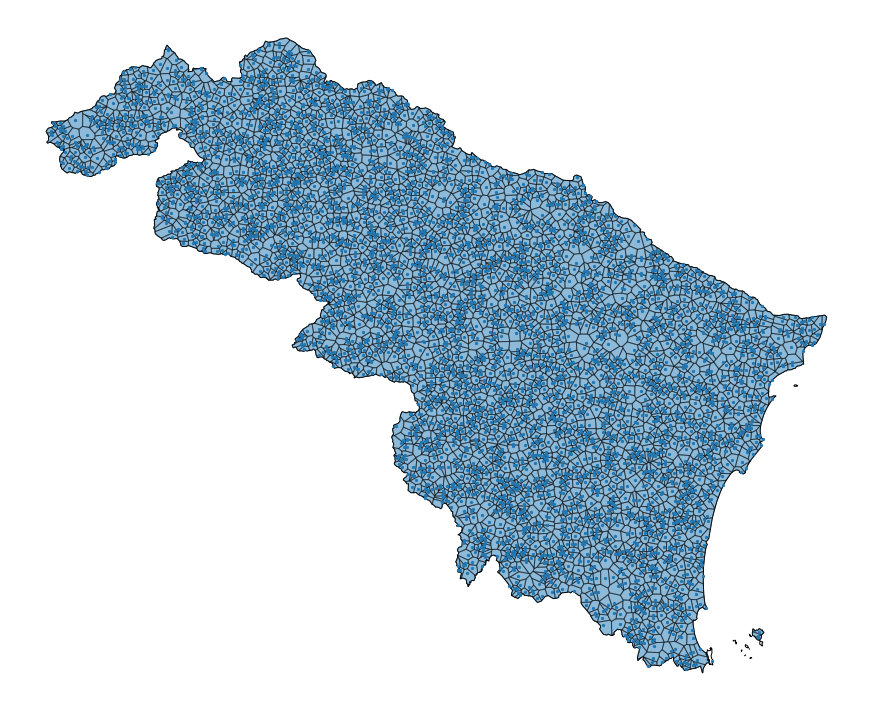

In [45]:
import matplotlib.pyplot as plt
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area

fig, ax = subplot_for_map(figsize=(18, 10))

plot_voronoi_polys_with_points_in_area(ax, area_shape.geometry[0], region_polys, points)

plt.tight_layout()

plt.show()


In [30]:
vonorol =  pd.DataFrame.from_dict(region_polys, orient='index', columns=['geometry'])

In [31]:
vonorol = vonorol.set_geometry('geometry')

In [32]:
vonorol.loc[:,'name'] = vonorol.index

In [33]:
zs = zonal_stats(vonorol.geometry, wind, stats=['mean','std'])

In [34]:
demstats_df = pd.DataFrame(zs)

demstats_df.rename(columns={'mean':'dem_mean','std':'dem_std'}, inplace=True)

In [35]:
vonorol = pd.concat([vonorol, demstats_df], axis=1)

In [36]:
vonorol.columns

Index(['geometry', 'name', 'dem_mean', 'dem_std'], dtype='object')

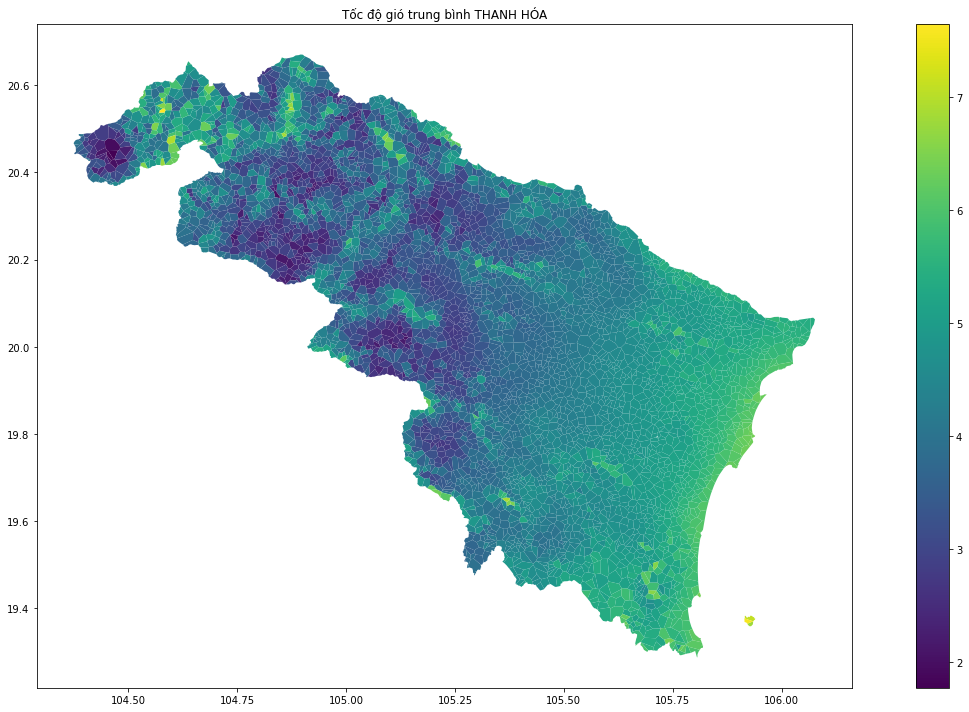

In [28]:
fig, ax = plt.subplots(1,  figsize=(18, 10))

plt.title("Tốc độ gió trung bình THANH HÓA")

vonorol.plot(column='dem_mean', ax=ax, legend=True)

plt.tight_layout()



<AxesSubplot:title={'center':'Tốc độ gió trung bình lớn hơn 7'}>

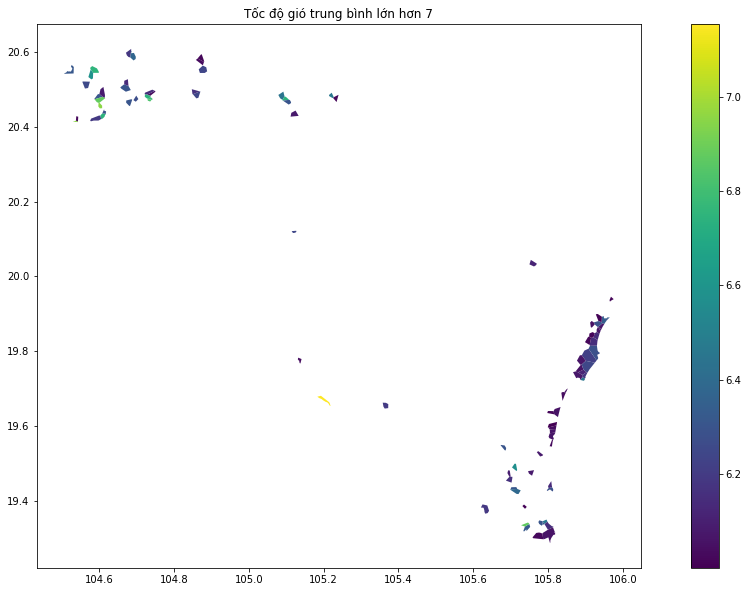

In [59]:
fig, ax = plt.subplots(1,  figsize=(18, 10))

plt.title("Tốc độ gió trung bình lớn hơn 7")

vonorol[vonorol.dem_mean > 6].plot(column='dem_mean', ax=ax, legend=True)



In [55]:
from geovoronoi import calculate_polygon_areas 

#calculate_polygon_areas(region_polys)

{0: 0.0002676379486937828,
 1: 0.0001448369976821887,
 2: 0.0002248508191525317,
 3: 0.00013051331292022016,
 4: 0.00021487517418288774,
 5: 7.942212720664053e-05,
 6: 2.6560819308698142e-05,
 7: 0.00023595008131511845,
 8: 0.00010730628958948025,
 9: 9.88113776231793e-05,
 10: 0.0002425432813266665,
 11: 0.00041457734490357457,
 12: 0.000489926063710769,
 13: 0.00022390831484152957,
 14: 0.00034438476670500806,
 15: 0.00014505049246812336,
 16: 0.00017217524465511284,
 17: 0.00012309630634803882,
 18: 0.00011083020657604751,
 19: 0.0001899688217030042,
 20: 0.00013375096361360734,
 21: 0.00037981283054454957,
 22: 0.00022146063046390795,
 23: 0.00021403800893842707,
 24: 0.00013420872898262985,
 25: 0.00028506960654584235,
 26: 8.686728348925194e-05,
 27: 0.00017599603246036687,
 28: 0.00010311475331441707,
 29: 0.00011001084935313243,
 30: 9.472897516126241e-05,
 31: 0.00017491874184310288,
 32: 0.00047479105419878176,
 33: 0.0003461302021683298,
 34: 0.00011753248075853837,
 35: 0.0

In [63]:
import geopandas as gpd
import fiona

fiona.supported_drivers['KML'] = 'rw'

gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.to_file('test.kml', driver='KML')

In [64]:
vonorol[vonorol.dem_mean > 6].to_file('C:/Users/GIGABYTE/Desktop/Đánh giá tiềm năng khu vực/Ranh gioi/Ranh_Thanh_Hoa.kml', driver='KML')